### EDA (Exploratory Data Analysis) of [Food.com dataset](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions)

In [2]:
!ls datasets/food-com-recipes-and-user-interactions/

ingr_map.pkl		interactions_validation.csv  RAW_interactions.csv
interactions_test.csv	PP_recipes.csv		     RAW_recipes.csv
interactions_train.csv	PP_users.csv


In [33]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)
plt.style.use('seaborn-dark')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
train_df = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_train.csv')
test_df  = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_test.csv')
valid_df = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_validation.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   date       698901 non-null  object 
 3   rating     698901 non-null  float64
 4   u          698901 non-null  int64  
 5   i          698901 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ MB


In [6]:
(train_df.shape, test_df.shape, train_df.shape[0] / test_df.shape[0])

((698901, 6), (12455, 6), 56.114090726615814)

In [7]:
train_df

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [8]:
train_df.describe()

,user_id,recipe_id,rating,u,i
count,6.989010e+05,698901.000000,698901.000000,698901.000000,698901.000000
mean,1.247694e+07,156173.409849,4.574090,4249.330271,87519.330993
std,1.525031e+08,126594.880211,0.959022,5522.602821,51290.370370
min,1.533000e+03,38.000000,0.000000,0.000000,0.000000
25%,1.059880e+05,53169.000000,4.000000,455.000000,42988.000000
50%,2.301020e+05,116484.000000,5.000000,1737.000000,87424.000000
75%,4.801950e+05,234516.000000,5.000000,5919.000000,131731.000000
max,2.002313e+09,537458.000000,5.000000,25075.000000,178262.000000


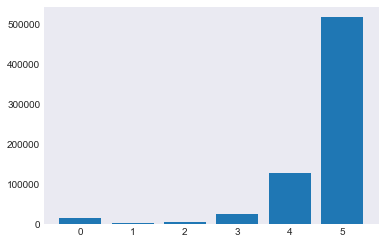

In [9]:
#train_df.hist(column='rating', bins=range(6+1));
def nice_hist(data):
    labels, counts = np.unique(data, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

nice_hist(train_df[['rating']])

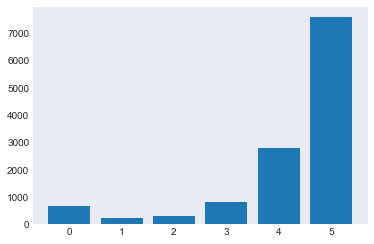

In [10]:
nice_hist(test_df[['rating']])

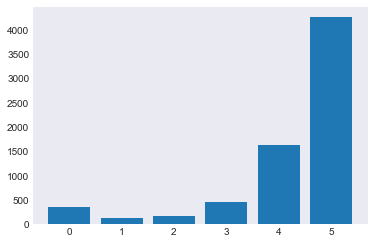

In [9]:
nice_hist(valid_df[['rating']])

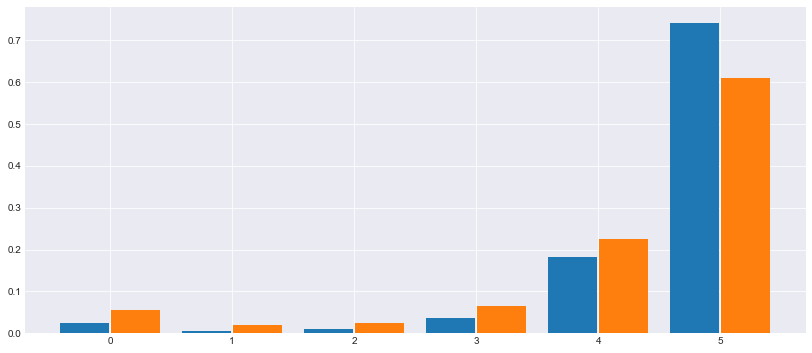

In [32]:
plt.figure(figsize=(14, 6))
labels, counts_train = np.unique(train_df[['rating']], return_counts=True)
_,      counts_test  = np.unique(test_df[['rating']],  return_counts=True)
bar_width = 0.4
plt.bar(labels - bar_width / 2 - 0.01, (counts_train / len(train_df)), bar_width, align='center')
plt.bar(labels + bar_width / 2 + 0.01, (counts_test / len(test_df)), bar_width, align='center')
plt.gca().set_xticks(labels)
plt.grid()
plt.show()

Parecería que **el testset está significativamente más balanceado a lo largo de los ratings** que el trainset, aún si todavía hay una gran preponderancia de los ratings altos.

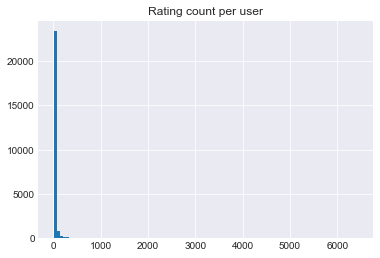

In [14]:
rating_count_per_user = train_df.groupby('user_id')[['rating']].count()

rating_count_per_user.hist(bins=100)
plt.title('Rating count per user');

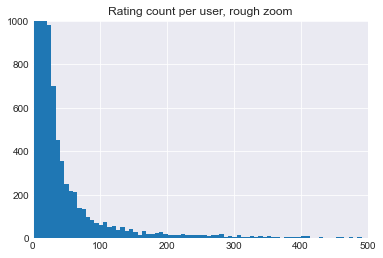

In [15]:
rating_count_per_user.hist(bins=1000)
plt.gca().set_xlim([0, 500])
plt.gca().set_ylim([0, 1000])
plt.title('Rating count per user, rough zoom')
plt.show()

In [26]:
print(
    f"Only {int(rating_count_per_user[rating_count_per_user > 100].count())} "
    f"({100 * float(rating_count_per_user[rating_count_per_user > 100].count() / rating_count_per_user.shape[0]):.3f} %)"
    " of users have made more than 100 reviews."
)
print(
    f"Only {int(rating_count_per_user[rating_count_per_user > 10].count())} "
    f"({100 * float(rating_count_per_user[rating_count_per_user > 10].count() / rating_count_per_user.shape[0]):.3f} %)"
    " of users have made more than 10 reviews."
)
print(
    f"{int(rating_count_per_user[rating_count_per_user <= 3].count())} "
    f"({100 * float(rating_count_per_user[rating_count_per_user <= 3].count() / rating_count_per_user.shape[0]):.3f} %)"
    " of users have made 3 reviews or less."
)

Only 1153 (4.598 %) of users have made more than 100 reviews.
Only 8640 (34.455 %) of users have made more than 10 reviews.
7685 (30.647 %) of users have made 3 reviews or less.


In [34]:
avg_rating_per_user = train_df.groupby('user_id')[['rating']].mean()

In [49]:
avg_rating_per_user

,rating
user_id,
1533,4.747826
1535,4.476117
1634,3.875000
1676,4.583333
1773,4.500000
...,...
2002204415,4.500000
2002214643,5.000000
2002227190,3.666667


In [66]:
import matplotlib.colors as colors
cmap = plt.get_cmap('RdYlGn')

def hist_with_gradient(data):
    n, bins, patches = plt.hist(avg_rating_per_user['rating'], bins=50)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    cols = bin_centers - min(bin_centers)
    cols /= max(cols)
    for c, p in zip(cols, patches):
        plt.setp(p, 'facecolor', cmap(c))
    plt.grid()

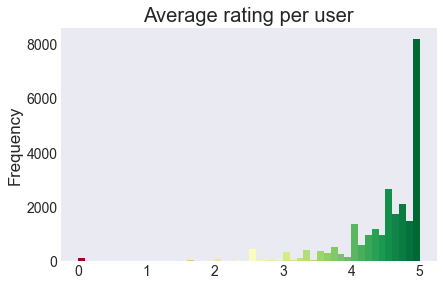

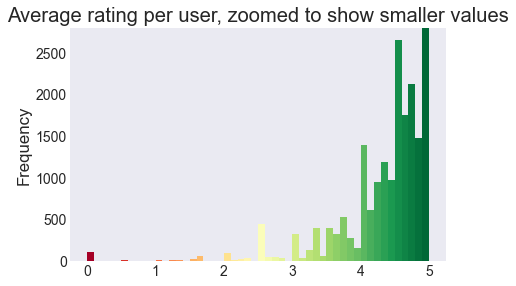

In [176]:
hist_with_gradient(avg_rating_per_user['rating'])
plt.title("Average rating per user")
plt.gca().set_ylabel('Frequency')
plt.grid()
plt.show()

hist_with_gradient(avg_rating_per_user['rating'])
plt.gca().set_ylim([None, 2800])
plt.gca().set_ylabel('Frequency')
plt.title("Average rating per user, zoomed to show smaller values");
plt.grid()

In [87]:
prop = avg_rating_per_user[avg_rating_per_user >= 4].count() / avg_rating_per_user.count()
print(f'{float(prop):.3f} % of users average a rating of 4 or more')

0.851 % of users average a rating of 4 or more


Rating is done on the range [0; 5] and only integers can be chosen. This means most of the time people just rate 5 stars. This could be because people mostly decide to review something when it's really good.

In [102]:
avg_rating_per_user

,rating
user_id,
1533,4.747826
1535,4.476117
1634,3.875000
1676,4.583333
1773,4.500000
...,...
2002204415,4.500000
2002214643,5.000000
2002227190,3.666667


In [104]:
avg_rating_per_user.loc[1533]

rating    4.747826
Name: 1533, dtype: float64

In [151]:
is_low_rater = avg_rating_per_user.loc[train_df['user_id']]['rating'] <= 1.0
# Would've been easier by just creating a dataframe of avg rating and rating count per user
low_raters = train_df[is_low_rater.to_list()]

In [129]:
low_raters

,user_id,recipe_id,date,rating,u,i
134,12200,9186,2001-07-05,5.0,12502,113765
136,12200,3595,2001-07-05,5.0,12502,66298
139,12200,9998,2001-07-06,0.0,12502,155957
140,12200,9985,2001-07-06,0.0,12502,155963
144,12200,10086,2001-07-09,0.0,12502,60533
...,...,...,...,...,...,...
698688,2001688000,131607,2018-10-28,0.0,7790,76163
698733,2002048922,66191,2018-11-04,0.0,22441,108563
698753,2001220317,239829,2018-11-07,0.0,18775,26863
698850,493093,286047,2018-12-07,1.0,7637,143537


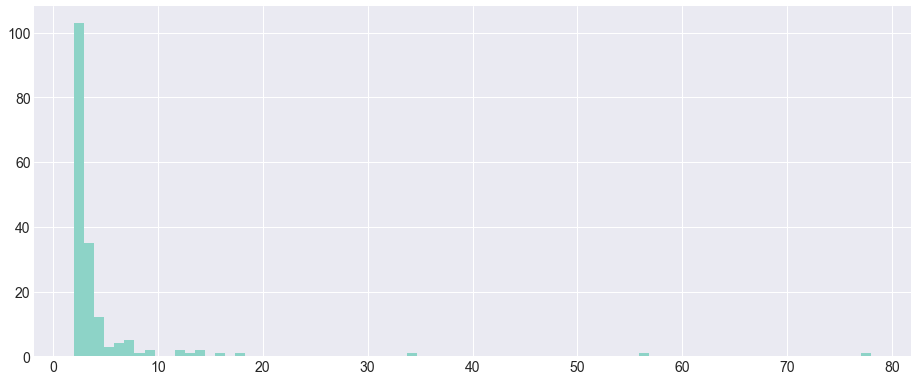

0.874 % of low raters left 5 or fewer reviews


In [177]:
rating_count_per_low_rater = low_raters.groupby('user_id')['user_id'].count()
plt.figure(figsize=(14, 6))
plt.hist(rating_count_per_low_rater, bins=max(rating_count_per_low_rater) + 1);
plt.grid()
plt.show()

prop = rating_count_per_low_rater[rating_count_per_low_rater <= 5].count() / rating_count_per_low_rater.count()
print(f'{float(prop):.3f} % of low raters left 5 or fewer reviews')

This small observation shows that most people whose average rating was 1 or less usually left very few reviews. Also, the dataset must be filtered to leave out people with only 1 review (which makes sense not only to leave out one-time users but also because you can't predict for someone with one data point).

Veo ahora la **desviación estándar** de rating por usuario

In [24]:
std_rating_per_user = train_df.groupby('user_id')[['rating']].std()

In [29]:
std_rating_per_user

,rating
user_id,
1533,0.723581
1535,0.775672
1634,1.524621
1676,0.974308
1773,0.707107
...,...
2002204415,0.707107
2002214643,0.000000
2002227190,0.577350


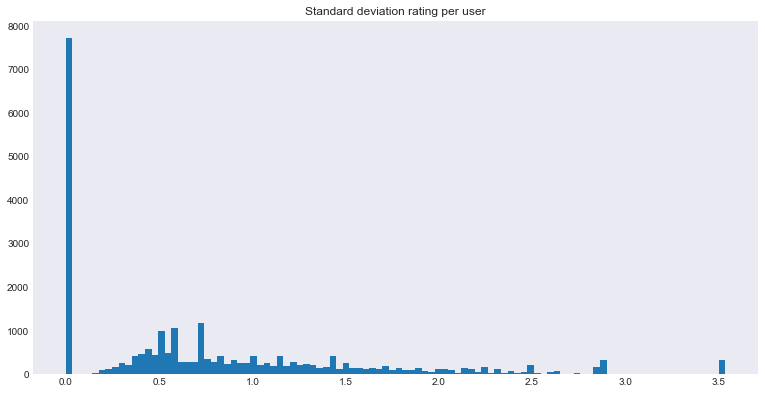

In [54]:
plt.figure(figsize=(13,6.5))
plt.hist(std_rating_per_user['rating'], bins=100)
plt.title('Standard deviation rating per user');

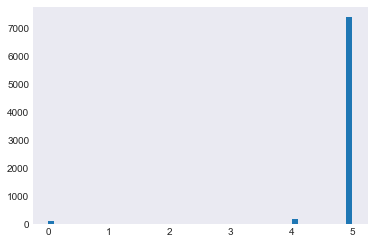

In [42]:
avg_for_users_with_no_std = avg_rating_per_user[std_rating_per_user['rating'] == 0.0]['rating']
plt.hist(avg_for_users_with_no_std, bins=50);

This histogram looks pretty much like the general one. This must simply be users who have rated very few things.

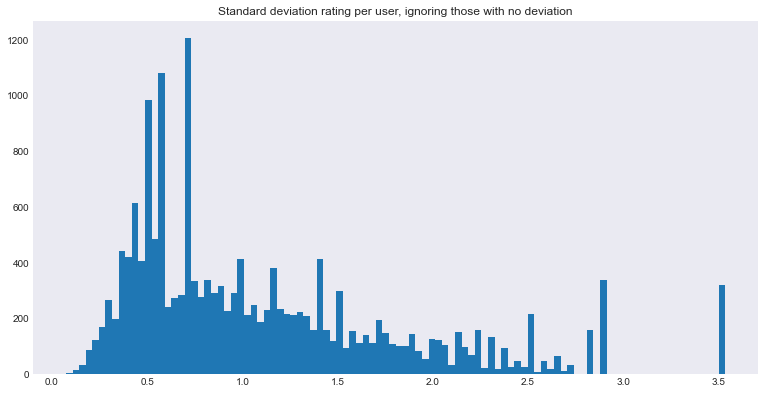

In [57]:
plt.figure(figsize=(13,6.5))
plt.hist(std_rating_per_user[std_rating_per_user['rating'] > 0.0]['rating'], bins=100)
plt.title('Standard deviation rating per user, ignoring those with no deviation');

In [63]:
pct = float(std_rating_per_user[std_rating_per_user['rating'] < 1.0].count() / std_rating_per_user.shape[0])
print(f'{pct:.3f} % of users have ratings with a std-dev below 1.0')

0.691 % of users have ratings with a std-dev below 1.0


In [58]:
std_rating_per_user.shape

(25076, 1)

In [230]:
rating_count_per_recipe = train_df.groupby('recipe_id')[['rating']].count()
#rating_count_per_recipe.rename(columns={'rating': 'count'})
print(
    f"Only {int(rating_count_per_recipe[rating_count_per_recipe > 100].count())} "
    f"({100 * float(rating_count_per_recipe[rating_count_per_recipe > 100].count() / rating_count_per_recipe.count()):.3f} %)"
    " recipes have more than 100 reviews."
)
print(
    f"Only {int(rating_count_per_recipe[rating_count_per_recipe > 5].count())} "
    f"({100 * float(rating_count_per_recipe[rating_count_per_recipe > 5].count() / rating_count_per_recipe.count()):.3f} %)"
    " recipes have more than 5 reviews!"
)
print(
    f"{int(rating_count_per_recipe[rating_count_per_recipe <= 2].count())} "
    f"({100 * float(rating_count_per_recipe[rating_count_per_recipe <= 2].count() / rating_count_per_recipe.count()):.3f} %)"
    " recipes have only 1 or 2 reviews!!"
)

Only 402 (0.250 %) recipes have more than 100 reviews.
Only 27018 (16.792 %) recipes have more than 5 reviews!
98286 (61.085 %) recipes have only 1 or 2 reviews!!


Very few recipes have more than 100 reviews, so i'll just ignore those for plotting.

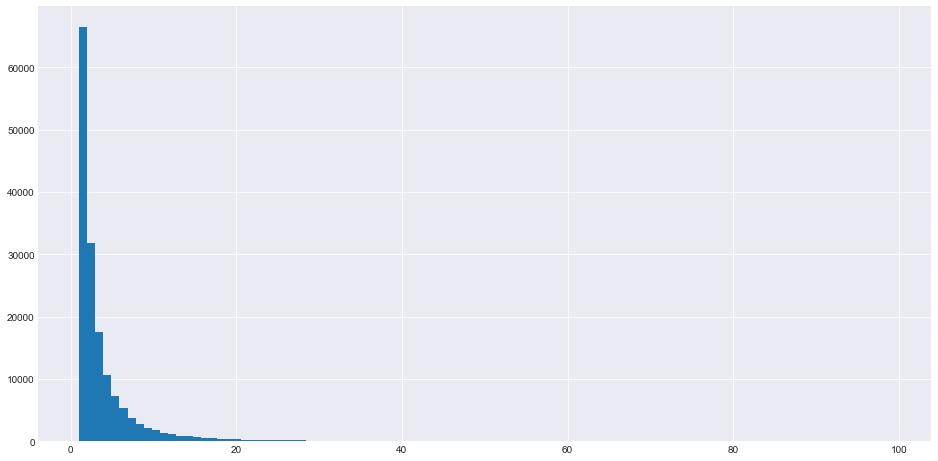

In [43]:
plt.figure(figsize=(16,8))
plt.hist(rating_count_per_recipe[rating_count_per_recipe['rating'] < 100]['rating'], bins=100)
plt.grid()

In [47]:
#rating_count_per_recipe.sort_values(by='rating')  # it's actually 'count' but couldn't rename it
rating_count_per_recipe.sort_values(by='rating').tail(15)

,rating
recipe_id,
77397,546
63689,570
67256,625
33919,629
82102,655
28148,666
25885,677
68955,681
22782,738


Most recipes have very few reviews, but there's two with more than a thousand each!

In [2]:
import pandas as pd

In [3]:
raw_recipes = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/RAW_recipes.csv')

In [28]:
pd.concat(g for _, g in raw_recipes.groupby('steps') if len(g) > 1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
1852,a berry lime martini,254489,5,431813,2007-09-21,"['15-minutes-or-less', 'time-to-make', 'course...","[71.3, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2,"['add all ingredients to a shaker with ice', '...",from padley wood.,"['lime-flavored vodka', 'fresh lime juice', 'r...",5
124101,lime and elderflower martini,254488,5,431813,2007-09-21,"['15-minutes-or-less', 'time-to-make', 'course...","[136.8, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2,"['add all ingredients to a shaker with ice', '...",from padley wood.,"['lime-flavored vodka', 'fresh lime juice', 'e...",4
156586,pear and lime martini,254487,5,431813,2007-09-21,"['15-minutes-or-less', 'time-to-make', 'course...","[150.8, 0.0, 17.0, 0.0, 0.0, 0.0, 1.0]",2,"['add all ingredients to a shaker with ice', '...",from padley wood.,"['lime-flavored vodka', 'pear liqueur', 'lime ...",5
39118,cheeky chocolate smoothie,246787,7,427184,2007-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[232.4, 12.0, 58.0, 3.0, 15.0, 20.0, 12.0]",1,['add all ingredients to blender and blend unt...,healthy low gl smoothie for those chocolate cr...,"['water', 'milk', 'cocoa', 'banana', 'gingerro...",7
88520,frozen strawberry banana smoothie,269906,2,577823,2007-12-05,"['15-minutes-or-less', 'time-to-make', 'course...","[211.1, 5.0, 85.0, 14.0, 14.0, 10.0, 13.0]",1,['add all ingredients to blender and blend unt...,a delicious smoothie that's almost like a shak...,"['frozen strawberries', 'banana', 'splenda gra...",5
...,...,...,...,...,...,...,...,...,...,...,...,...
34638,canapes with garlicky tomato spread,19830,15,23302,2002-02-16,"['15-minutes-or-less', 'time-to-make', 'course...","[110.8, 12.0, 3.0, 8.0, 5.0, 23.0, 2.0]",3,['use blender or food processor to puree all i...,delicious german hors d'oeuvres,"['cream cheese', 'tomato paste', 'garlic', 'sa...",5
34639,canapes with green spread,19827,15,23302,2002-02-16,"['15-minutes-or-less', 'time-to-make', 'course...","[73.1, 7.0, 2.0, 7.0, 2.0, 14.0, 2.0]",3,['use blender or food processor to puree all i...,delicious german hors d'oeuvres,"['fresh parsley', 'butter', 'lemon juice', 'sa...",5
72584,do it yourself mild and creamy yellow curry paste,467555,10,65502,2011-11-06,"['15-minutes-or-less', 'time-to-make', 'course...","[190.4, 3.0, 91.0, 79.0, 8.0, 1.0, 14.0]",5,['whirl all ingredients in a food processor or...,ta-ta to the bottled paste! whipping up this p...,"['fresh ginger', 'red onion', 'chili-garlic sa...",10
72586,do it yourself red curry paste,467552,10,65502,2011-11-06,"['15-minutes-or-less', 'time-to-make', 'course...","[180.7, 3.0, 89.0, 79.0, 8.0, 1.0, 13.0]",5,['whirl all ingredients in a food processor or...,ta-ta to the bottled paste! whipping up this p...,"['fresh ginger', 'red onion', 'chili-garlic sa...",9


In [32]:
pp_recipes = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/PP_recipes.csv')

In [33]:
pp_recipes

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


In [35]:
sum(pp_recipes['ingredient_tokens'].duplicated())

566

In [38]:
a = pp_recipes.groupby('ingredient_tokens')

In [41]:
b = [len(g) for _, g in a]

(array([1.77173e+05, 4.94000e+02, 2.60000e+01, 6.00000e+00]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

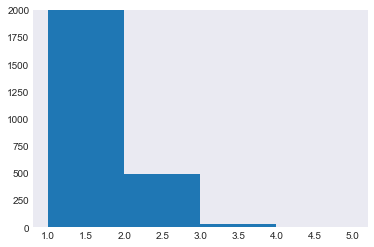

In [50]:
c = plt.hist(b, bins=[1, 2, 3, 4, 5])
plt.ylim(None, 2000)
c

In [45]:
max(b)

5

In [53]:
c = pd.concat(g for _, g in pp_recipes.groupby('ingredient_tokens') if len(g) == 5)
c

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
12656,238085,8914,"[40480, 1092, 488, 19034, 17002, 40481]","[[17918], [15473, 8361], [6953], [3151, 12486]...","[40480, 40482, 2525, 10906, 485, 44, 22328, 93...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[2683, 332, 6270, 6473, 4717]"
34116,2121,111512,"[40480, 7927, 3635, 17002, 40481]","[[17918], [15473, 8361], [6953], [3151, 12486]...","[40480, 40482, 729, 2525, 10906, 485, 44, 8393...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 332, 6270, 6473, 4717]"
104153,111790,130864,"[40480, 868, 7209, 14349, 29139, 40481]","[[17918], [15473, 8361], [6953], [3151, 12486]...","[40480, 40482, 23667, 589, 2832, 33571, 1281, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,"[2683, 332, 6270, 6473, 4717]"
127955,242957,105119,"[40480, 1631, 252, 17002, 40481]","[[17918], [15473, 8361], [6953], [3151, 12486]...","[40480, 40482, 23667, 2832, 16126, 40478, 4048...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1,"[2683, 332, 6270, 6473, 4717]"
166070,362018,52214,"[40480, 2279, 2044, 37453, 17002, 40481]","[[17918], [15473, 8361], [6953], [3151, 12486]...","[40480, 40482, 729, 2525, 481, 10906, 485, 44,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[2683, 332, 6270, 6473, 4717]"
36678,61729,112968,"[40480, 17746, 519, 3719, 596, 22422, 834, 460...","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 8654, 30295, 240, 519, 1016, 29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[4231, 4379, 5038, 7655, 6906]"
47645,155159,115226,"[40480, 17746, 556, 246, 7060, 40481]","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 5654, 481, 7524, 617, 30295, 24...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[4231, 4379, 5038, 7655, 6906]"
120806,370846,30095,"[40480, 10692, 628, 31248, 32887, 4481, 40481]","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 5654, 481, 7524, 617, 1183, 664...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[4231, 4379, 5038, 7655, 6906]"
142833,92876,52661,"[40480, 7250, 17746, 40481]","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 5654, 481, 7524, 617, 282, 498,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[4231, 4379, 5038, 7655, 6906]"
168942,182345,124358,"[40480, 3470, 16642, 17746, 40481]","[[30295], [519, 1016], [22422], [1353], [6444]]","[40480, 40482, 5654, 481, 7524, 617, 282, 1183...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[4231, 4379, 5038, 7655, 6906]"


In [63]:
raw_recipes.loc[raw_recipes['id'].isin(c['id'])]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
10336,aunt frances lemonade,182345,10,139541,2006-08-18,"['15-minutes-or-less', 'time-to-make', 'course...","[1677.3, 4.0, 1466.0, 3.0, 29.0, 1.0, 156.0]",5,['squeeze the juice from 4 each of the lemons ...,the combination of fruits was a sweet and tang...,"['lemons', 'limes', 'oranges', 'water', 'sugar']",5
18545,basic tea biscuits,2121,30,1796,1999-10-13,"['30-minutes-or-less', 'time-to-make', 'course...","[111.9, 8.0, 0.0, 10.0, 4.0, 7.0, 4.0]",15,"['preheat oven to 450 degrees f', 'combine dry...",NaN,"['flour', 'baking powder', 'salt', 'shortening...",5
54499,citrusade citrus ade,370846,20,1072593,2009-05-08,"['30-minutes-or-less', 'time-to-make', 'course...","[137.8, 0.0, 124.0, 0.0, 1.0, 0.0, 12.0]",6,"['squeeze the juice from each fruit', 'pour in...",my kids grew up on this stuff.,"['lemons', 'limes', 'oranges', 'water', 'sugar']",5
122738,lemonade limeade oranges too wow,61729,15,41706,2003-05-08,"['15-minutes-or-less', 'time-to-make', 'course...","[1806.8, 3.0, 1684.0, 4.0, 21.0, 1.0, 158.0]",7,"['slice lemons , limes& oranges thinly', 'plac...",this is so yummy - and easy to prepare! - a ni...,"['lemons', 'limes', 'oranges', 'water', 'sugar']",5
122798,lemonade with a twist,155159,10,281399,2006-02-07,"['15-minutes-or-less', 'time-to-make', 'course...","[102.3, 0.0, 88.0, 0.0, 1.0, 0.0, 9.0]",7,"['squeeze the juice from lemons , limes and or...",very freshing on those hot days of summer,"['lemons', 'limes', 'oranges', 'water', 'sugar']",5
123583,light and tasty biscuits,238085,30,282379,2007-07-01,"['30-minutes-or-less', 'time-to-make', 'course...","[409.1, 29.0, 0.0, 22.0, 15.0, 27.0, 16.0]",9,"['heat oven to 475 degrees', 'sift together fl...",i got this recipe from a neighbor-lady when i ...,"['flour', 'baking powder', 'salt', 'shortening...",5
138061,mom s biscuits,242957,20,501839,2007-07-29,"['30-minutes-or-less', 'time-to-make', 'course...","[361.9, 22.0, 0.0, 36.0, 14.0, 19.0, 16.0]",10,"['combine dry ingredients', 'cut in shortening...",a light fluffy biscuit--- perfect with either ...,"['flour', 'baking powder', 'salt', 'shortening...",5
143198,never fail dumplings,111790,30,195447,2005-02-23,"['30-minutes-or-less', 'time-to-make', 'course...","[253.9, 16.0, 0.0, 22.0, 11.0, 15.0, 11.0]",6,"['combine all dry ingredient together', 'cut i...",easy to make and you will always get great dum...,"['flour', 'baking powder', 'salt', 'shortening...",5
168940,quick food processor biscuits,362018,17,1120293,2009-03-21,"['30-minutes-or-less', 'time-to-make', 'course...","[409.1, 29.0, 0.0, 22.0, 15.0, 27.0, 16.0]",9,"['preheat the oven to 475 degrees', 'put the f...","these light, tasty biscuits are very quick whe...","['flour', 'baking powder', 'salt', 'shortening...",5
192443,southern lemonade,92876,10,95114,2004-06-07,"['15-minutes-or-less', 'time-to-make', 'course...","[139.8, 0.0, 122.0, 0.0, 2.0, 0.0, 13.0]",7,['squeeze the juice from 4 of each of the frui...,a thirst quenching drink that contains more th...,"['lemons', 'limes', 'oranges', 'water', 'sugar']",5


In [2]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

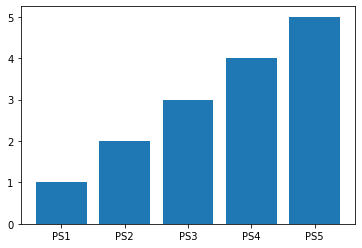

In [3]:
plt.bar([f'PS{i}' for i in range(1, 6)], range(1, 6))

In [48]:
avg_and_count = pd.DataFrame(train_df.groupby('recipe_id')['rating'].mean())
avg_and_count = avg_and_count.rename(columns={'rating': 'avg_rating'})
avg_and_count['ratings_count'] = train_df.groupby('recipe_id')['rating'].count()

In [49]:
avg_and_count

,avg_rating,ratings_count
recipe_id,,
38,4.333333,3
40,4.800000,5
45,4.000000,2
46,5.000000,2
49,4.000000,12
...,...,...
536729,4.750000,4
536990,5.000000,1
537175,5.000000,1


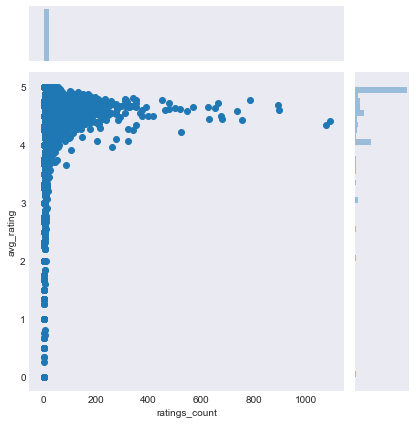

In [50]:
sns.jointplot(x='ratings_count', y='avg_rating', data=avg_and_count);

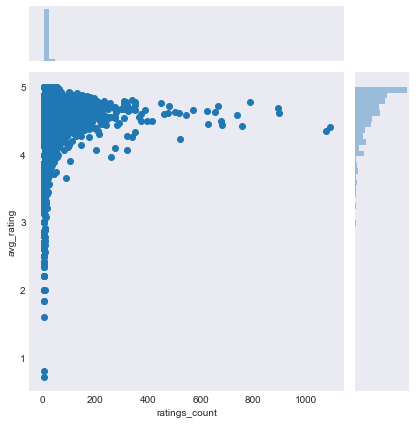

In [57]:
sns.jointplot(x='ratings_count', y='avg_rating', data=avg_and_count[avg_and_count['ratings_count'] >= 5]);